# **Helper Functions**

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

In [93]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

<a name="2.4"></a>
Cost function for logistic regression

 for logistic regression, the cost function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is -

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.


In [94]:
def compute_cost(X, y, w, b, lambda_):
    m = X.shape[0]
    f_wb = sigmoid(np.dot(X, w) + b)

    epsilon = 1e-15
    cost = (1/m) * np.sum(-y * np.log(f_wb + epsilon) - (1 - y) * np.log(1 - f_wb + epsilon))

    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    total_cost = cost + reg_cost

    return total_cost





e the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.



In [95]:

def compute_gradient(X, y, w, b, lambda_):
    m, n = X.shape
    f_wb = sigmoid(np.dot(X, w) + b)

    dj_dw = (1 / m) * np.dot(X.T, (f_wb - y))
    dj_db = (1 / m) * np.sum(f_wb - y)

    dj_dw = dj_dw + (lambda_ / m) * w

    return dj_db, dj_dw

In [96]:
# Gradient Descent Function

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)
    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i < 100000:
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.4f}")

    return w_in, b_in, J_history

def predict(X, w, b):
    # Predict with a sigmoid output and threshold at 0.5
    z = np.dot(X, w) + b
    p = sigmoid(z)
    return (p >= 0.5).astype(int)




#Shuru Karo

In [97]:
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1).values
y = df['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.0
alpha = 0.1
num_iters = 1000
lambda_ = 0.1


w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient,
                                            alpha, num_iters, lambda_)


y_pred = predict(X_test, w_final, b_final)

accuracy_manual = np.mean(y_pred == y_test) * 100
accuracy_sklearn = accuracy_score(y_test, y_pred) * 100

print("\nAccuracy on the test set:")
print(f"Manual Calculation: {accuracy_manual:.2f}%")
print(f"Sklearn Accuracy Score: {accuracy_sklearn:.2f}%")

Iteration    0: Cost   0.6634
Iteration  100: Cost   0.3627
Iteration  200: Cost   0.3524
Iteration  300: Cost   0.3501
Iteration  400: Cost   0.3494
Iteration  500: Cost   0.3492
Iteration  600: Cost   0.3491
Iteration  700: Cost   0.3491
Iteration  800: Cost   0.3491
Iteration  900: Cost   0.3491
Iteration  999: Cost   0.3491

Accuracy on the test set:
Manual Calculation: 85.25%
Sklearn Accuracy Score: 85.25%


# Simple Data Visualisation

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math

# --- Helper Functions from previous discussions ---

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b, lambda_):
    m = X.shape[0]
    f_wb = sigmoid(np.dot(X, w) + b)
    epsilon = 1e-15
    cost = (1/m) * np.sum(-y * np.log(f_wb + epsilon) - (1 - y) * np.log(1 - f_wb + epsilon))
    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    total_cost = cost + reg_cost
    return total_cost

def compute_gradient(X, y, w, b, lambda_):
    m, n = X.shape
    f_wb = sigmoid(np.dot(X, w) + b)
    dj_dw = (1 / m) * np.dot(X.T, (f_wb - y))
    dj_db = (1 / m) * np.sum(f_wb - y)
    dj_dw = dj_dw + (lambda_ / m) * w
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)
    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i < 100000:
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

    return w_in, b_in, J_history

def predict(X, w, b):
    z = np.dot(X, w) + b
    p = sigmoid(z)
    return (p >= 0.5).astype(int)

# --- Main Script ---

# Load the data
df = pd.read_csv('heart.csv')



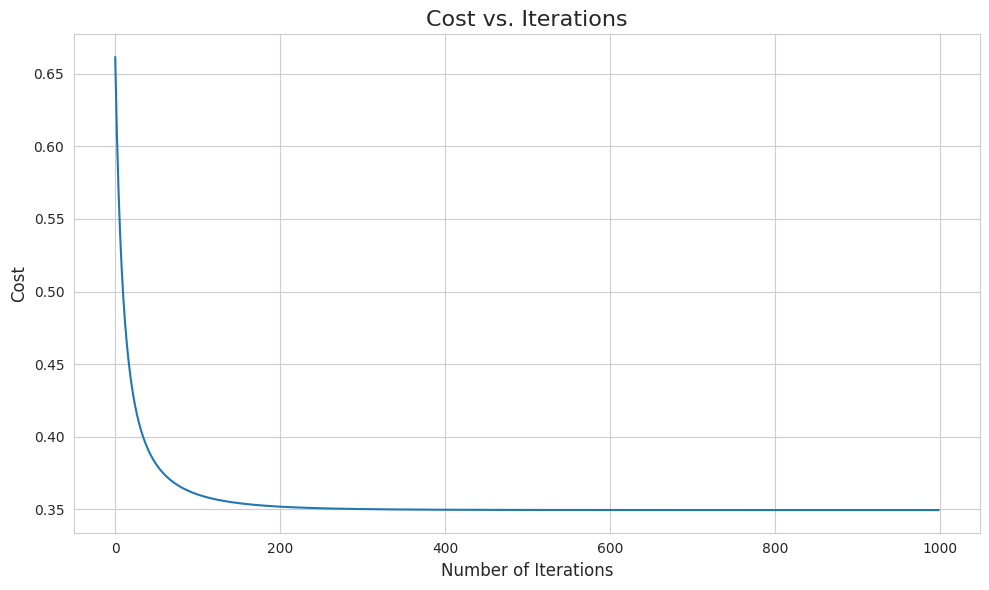

In [99]:
X_all = df.drop('target', axis=1).values
y_all = df['target'].values
scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(X_all)
w_initial_all = np.zeros(X_scaled_all.shape[1])
b_initial_all = 0.0
alpha = 0.1
num_iters = 1000
lambda_ = 0.1
_, _, J_hist = gradient_descent(X_scaled_all, y_all, w_initial_all, b_initial_all,
                                            compute_cost, compute_gradient, alpha, num_iters, lambda_)
plt.figure(figsize=(10, 6))
plt.plot(range(num_iters), J_hist)
plt.title('Cost vs. Iterations', fontsize=16)
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('cost_vs_iterations.png')

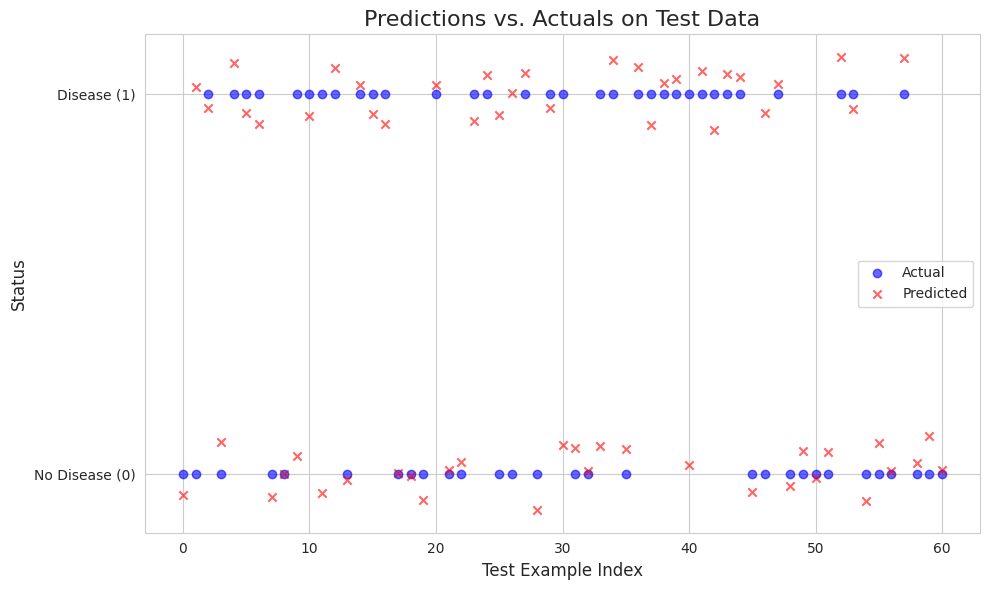

In [100]:
# --- Part 2: Predictions vs. Actuals Plot ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled_all, y_all, test_size=0.2, random_state=42)
w_final, b_final, _ = gradient_descent(X_train, y_train, w_initial_all, b_initial_all,
                                       compute_cost, compute_gradient, alpha, num_iters, lambda_)
y_pred = predict(X_test, w_final, b_final)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', marker='o', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred + np.random.uniform(-0.1, 0.1, len(y_pred)),
            c='red', marker='x', label='Predicted', alpha=0.6)
plt.yticks([0, 1], ['No Disease (0)', 'Disease (1)'])
plt.title('Predictions vs. Actuals on Test Data', fontsize=16)
plt.xlabel('Test Example Index', fontsize=12)
plt.ylabel('Status', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('predictions_vs_actuals.png')

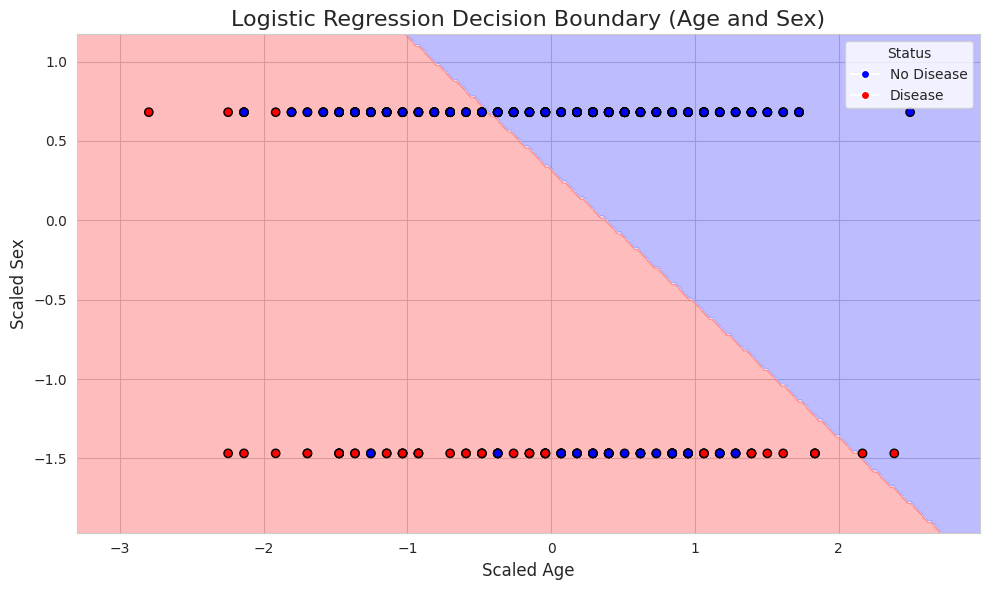

In [101]:
# --- Part 3: Decision Boundary Plot (using only Age and Sex) ---
X_2d = df[['age', 'sex']].values
y_2d = df['target'].values
scaler_2d = StandardScaler()
X_scaled_2d = scaler_2d.fit_transform(X_2d)
model_2d = LogisticRegression(solver='liblinear', random_state=42)
model_2d.fit(X_scaled_2d, y_2d)
x_min, x_max = X_scaled_2d[:, 0].min() - 0.5, X_scaled_2d[:, 0].max() + 0.5
y_min, y_max = X_scaled_2d[:, 1].min() - 0.5, X_scaled_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_scaled_2d[:, 0], X_scaled_2d[:, 1], c=y_2d, edgecolors='k', cmap='bwr')
plt.title('Logistic Regression Decision Boundary (Age and Sex)', fontsize=16)
plt.xlabel('Scaled Age', fontsize=12)
plt.ylabel('Scaled Sex', fontsize=12)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='No Disease'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='Disease')],
           title='Status')
plt.tight_layout()
plt.savefig('decision_boundary_plot.png')